<h1>Posicionamiento de gráficos</h1>

Aunque ya hemos visto algún ejemplo de posicionamiento (se podría considerar que la relación de aspecto del gráfico tiene más que ver con su posicionamiento que con la escala de los ejes), en este notebook vamos a ver qué posibilidades nos da matplotlib para la gestión de tamaños, grids multigráficos, etc.

Como siempre, empezamos por la carga del módulo y de los sets de datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mtcars = pd.read_table("mtcars.txt", sep = ",")
diamonds = pd.read_table("diamonds.txt", sep = ",")

<h2>Tamaño de gráficos</h2>

Como se ha podido ver hasta ahora, el tamaño por defecto del renderizado de gráficos puede no ser siempre el adecuado (generalmente, excesivamente pequeño si el número de elementos en el gráfico es alto). 

Para poder modificar el tamaño del gráfico resultante, como ya hemos visto, matplotlib nos ofrece la función <b>figure</b> y al atributo <b>figsize</b>. Hay que tener en cuenta que el tamaño del gráfico se debe establecer de forma previa a la llamada a cualquiera de las funciones de pyplot.

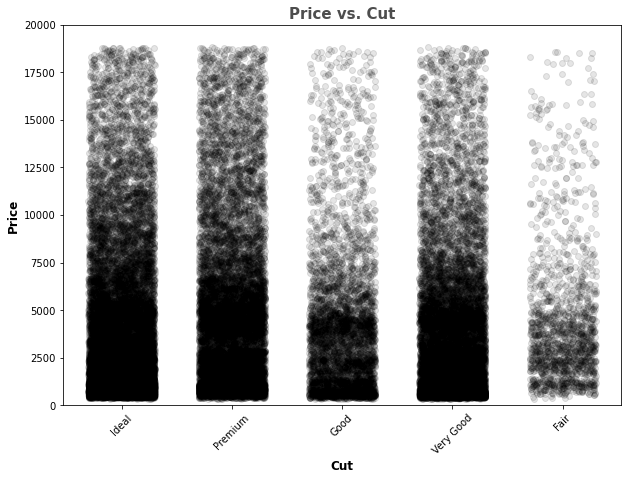

In [2]:
# Ampliación del tamaño del gráfico resultante
cuts = list(diamonds['cut'].unique())
x_values = [cuts.index(element) + np.random.uniform(-0.3, 0.3) for element in diamonds['cut']]
y_values = diamonds['price']
plt.figure(figsize = (10, 7))
plt.scatter(x_values, y_values, color = "black", alpha = 0.1)
plt.ylim(-0.5, 20000)
plt.title("Price vs. Cut", weight="bold", size=15, color = "0.3")
plt.xlabel("Cut", weight="bold", size=12)
plt.ylabel("Price", weight="bold", size=12)
plt.xticks(range(0, 5), cuts, rotation=45)
plt.show()

<h2>Grids multigráfico</h2>

En matplotlib, el funcionamiento de los grids multigráfico es muy similar al que encontramos en base-r en el que, a priori, tenemos que definir las dimensiones de la rejilla en la que pintaremos cada gráfico y tenemos que ir colocando de forma manual cada figura en el lugar que le corresponde. No tenemos aquí, por tanto, un sistema automático de posicionamiento como teníamos con el "facetting" de ggplot2.

Para hacer uso de este posicionamiento, matplotlib nos ofrece la función <b>subplot2grid</b>.

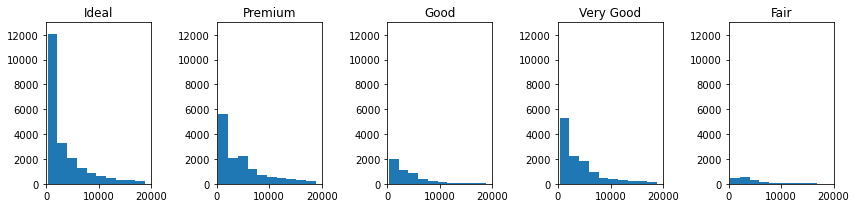

In [3]:
# Distribución de precio por corte
cuts = list(diamonds['cut'].unique())

plt.figure(figsize=(12, 3))
for i, element in enumerate(cuts):    
    plt.subplot2grid((1, len(cuts)), (0, i))
    plt.hist(diamonds[diamonds['cut'] == element].loc[:, 'price'].values)
    plt.xlim(0, 20000)
    plt.ylim(0, 13000)
    plt.title(element)

plt.tight_layout()
plt.show()

In [ ]:
# Distribución de precio por corte
cuts = list(diamonds['cut'].unique())

plt.figure(figsize=(10, 10))
for i, element in enumerate(cuts):    
    plt.subplot2grid((len(cuts), 1), (i, 0))
    plt.hist(diamonds[diamonds['cut'] == element].loc[:, 'price'].values)
    plt.xlim(0, 20000)
    plt.title(element)

plt.tight_layout()
plt.show()